In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
filepath = '/FileStore/tables/dana_scraping/user_vector_features.csv'
user_vectors_with_features = spark.read.parquet(f"dbfs:{filepath}")
df = user_vectors_with_features.toPandas()

In [0]:
# Filtering different subsets correctly
df_all = df.copy()  # All users
df_nonzero = df[df['percentile_group'] > 0].copy()  # Excluding percentile_group = 0
df_filtered = df[(df['percentile_group'] > 0) & (df['percentile_group'] < 5)].copy()  # Only 1-4


# Information Score distribution

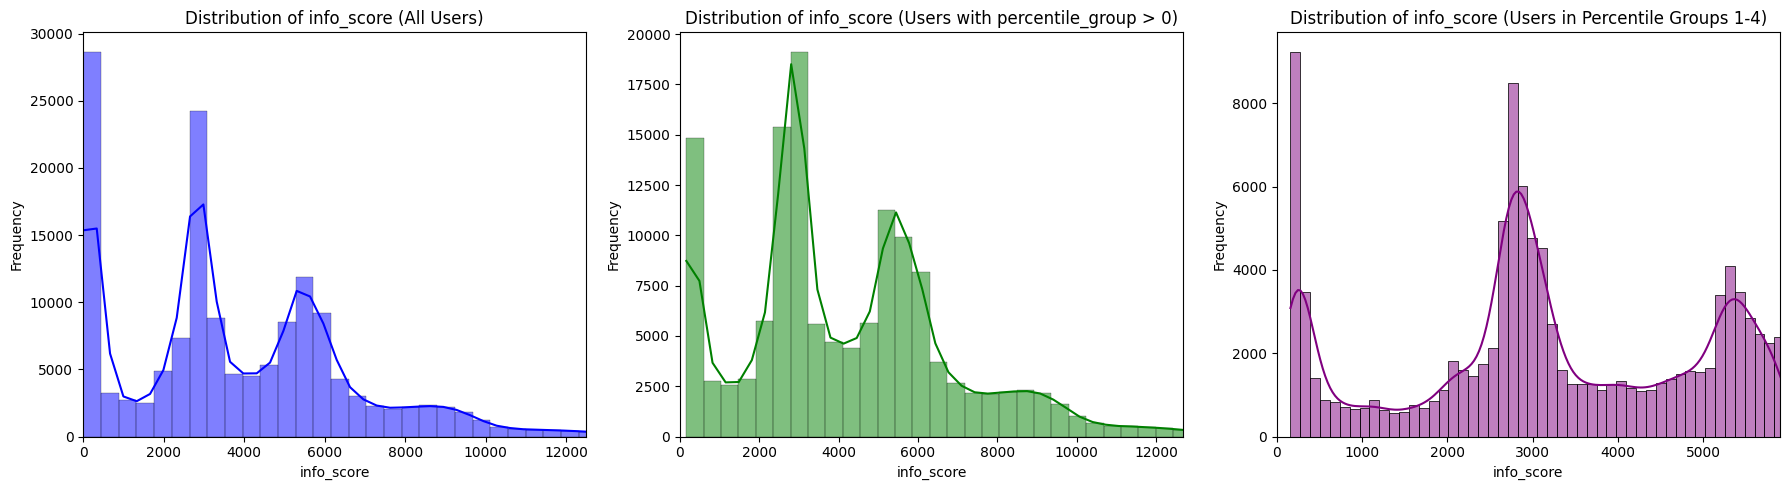

In [0]:
# Compute 99th percentile for each dataset
x_max_all = df_all['info_score'].quantile(0.99)
x_max_nonzero = df_nonzero['info_score'].quantile(0.99)
x_max_filtered = df_filtered['info_score'].quantile(0.99)

# Create histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False)  # Disable shared x-axis

# 1. All Users
sns.histplot(df_all['info_score'], bins=150, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution of info_score (All Users)")
axes[0].set_xlabel("info_score")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, x_max_all)  # Dynamic x-axis limit

# 2. Users with percentile_group > 0
sns.histplot(df_nonzero['info_score'], bins=150, kde=True, color='green', ax=axes[1])
axes[1].set_title("Distribution of info_score (Users with percentile_group > 0)")
axes[1].set_xlabel("info_score")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(0, x_max_nonzero)  # Dynamic x-axis limit

# 3. Users with percentile_group 1-4
sns.histplot(df_filtered['info_score'], bins=50, kde=True, color='purple', ax=axes[2])
axes[2].set_title("Distribution of info_score (Users in Percentile Groups 1-4)")
axes[2].set_xlabel("info_score")
axes[2].set_ylabel("Frequency")
axes[2].set_xlim(0, x_max_filtered)  # Dynamic x-axis limit

# Adjust layout
plt.tight_layout()
plt.show()

# Feature vectors distribution

### All users

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

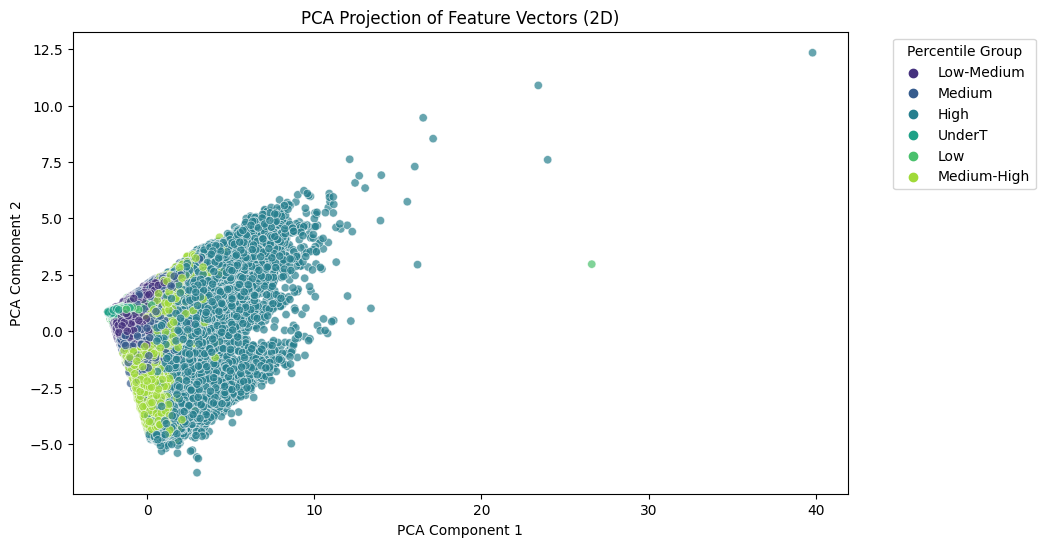

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

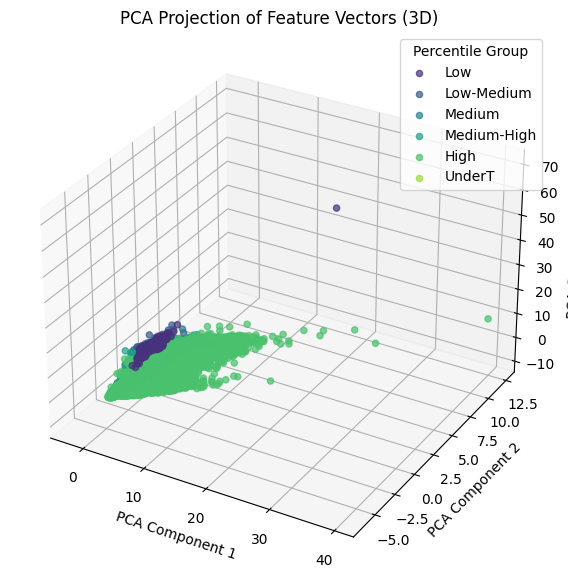

In [0]:
# Define a mapping for percentile_group labels
group_labels = {
    1: "Low",
    2: "Low-Medium",
    3: "Medium",
    4: "Medium-High",
    5: "High",
    0: "UnderT"
}
df_all['percentile_label'] = df_all['percentile_group'].map(group_labels)

# PCA to 2D
features = np.stack(df_all['features'].values)  # Assuming 'features' is stored as NumPy arrays
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(features_scaled)

df_all['pca_1'] = pca_2d_result[:, 0]
df_all['pca_2'] = pca_2d_result[:, 1]

# 2D PCA Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_all['pca_1'], y=df_all['pca_2'], hue=df_all['percentile_label'],
    palette='viridis', alpha=0.7
)
plt.title("PCA Projection of Feature Vectors (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Percentile Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# PCA to 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(features_scaled)

df_all['pca_3d_1'] = pca_3d_result[:, 0]
df_all['pca_3d_2'] = pca_3d_result[:, 1]
df_all['pca_3d_3'] = pca_3d_result[:, 2]

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on percentile group
colors = sns.color_palette("viridis", n_colors=len(group_labels))
color_mapping = {label: colors[i] for i, label in enumerate(group_labels.values())}

for label, color in color_mapping.items():
    subset = df_all[df_all['percentile_label'] == label]
    ax.scatter(
        subset['pca_3d_1'], subset['pca_3d_2'], subset['pca_3d_3'],
        label=label, alpha=0.7, color=color
    )

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("PCA Projection of Feature Vectors (3D)")
ax.legend(title="Percentile Group", loc='upper right')

plt.show()

### Users from groups 1-4 (exclude edges)

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

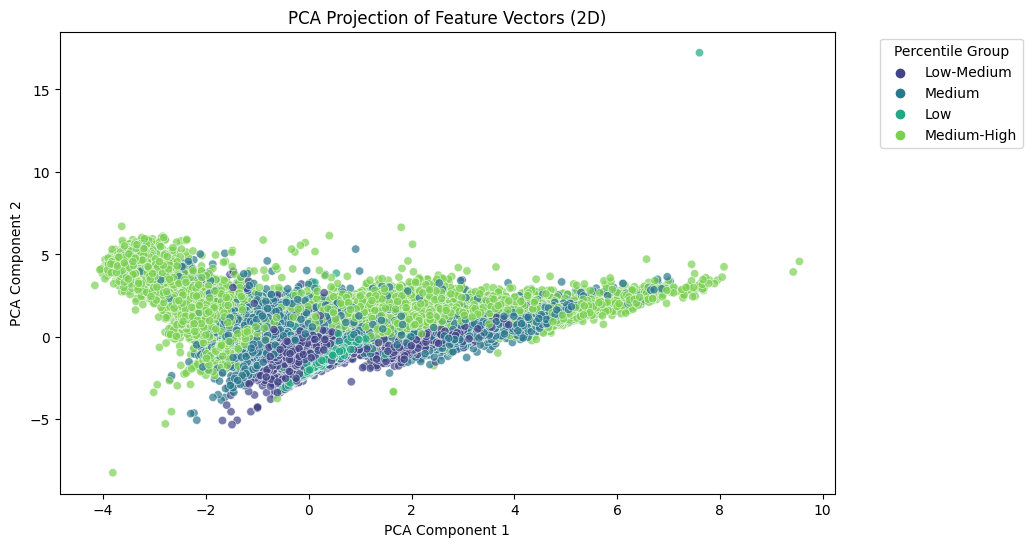

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

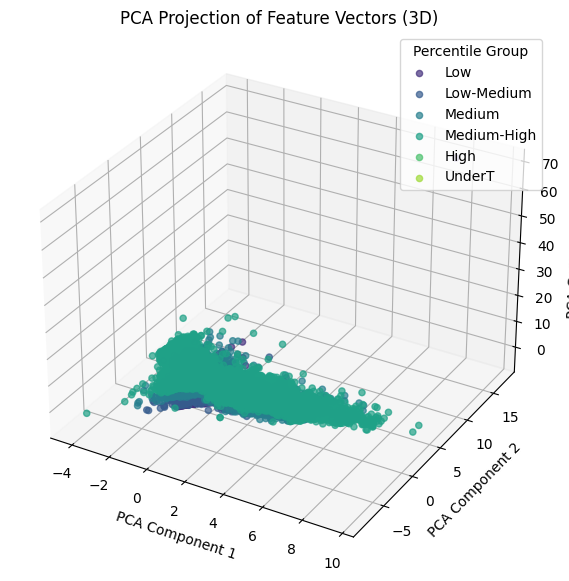

In [0]:
# Define a mapping for percentile_group labels
group_labels = {
    1: "Low",
    2: "Low-Medium",
    3: "Medium",
    4: "Medium-High",
    5: "High",
    0: "UnderT"
}
df_filtered['percentile_label'] = df_filtered['percentile_group'].map(group_labels)

# PCA to 2D
features = np.stack(df_filtered['features'].values)  # Assuming 'features' is stored as NumPy arrays
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(features_scaled)

df_filtered['pca_1'] = pca_2d_result[:, 0]
df_filtered['pca_2'] = pca_2d_result[:, 1]

# 2D PCA Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_filtered['pca_1'], y=df_filtered['pca_2'], hue=df_filtered['percentile_label'],
    palette='viridis', alpha=0.7
)
plt.title("PCA Projection of Feature Vectors (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Percentile Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# PCA to 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(features_scaled)

df_filtered['pca_3d_1'] = pca_3d_result[:, 0]
df_filtered['pca_3d_2'] = pca_3d_result[:, 1]
df_filtered['pca_3d_3'] = pca_3d_result[:, 2]

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on percentile group
colors = sns.color_palette("viridis", n_colors=len(group_labels))
color_mapping = {label: colors[i] for i, label in enumerate(group_labels.values())}

for label, color in color_mapping.items():
    subset = df_filtered[df_filtered['percentile_label'] == label]
    ax.scatter(
        subset['pca_3d_1'], subset['pca_3d_2'], subset['pca_3d_3'],
        label=label, alpha=0.7, color=color
    )

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("PCA Projection of Feature Vectors (3D)")
ax.legend(title="Percentile Group", loc='upper right')

plt.show()

### Information scores across percentile groups

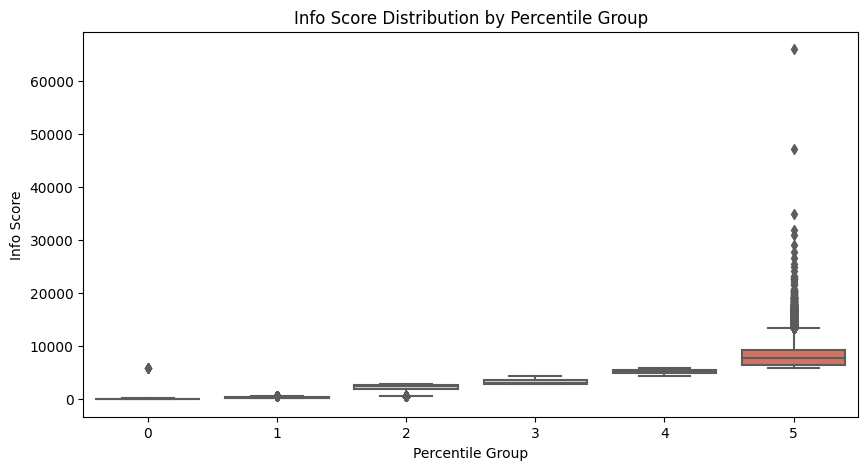

In [0]:
# Box plot of info_score per percentile_group
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['percentile_group'], y=df['info_score'], palette='coolwarm')
plt.title("Info Score Distribution by Percentile Group")
plt.xlabel("Percentile Group")
plt.ylabel("Info Score")
plt.show()
